In [1]:
import os
from pathlib import Path
compe='chaii-hindi-and-tamil-question-answering'
is_kaggle=os.environ.get('KAGGLE_KERNEL_RUNTYPE','')
if is_kaggle:
    path=Path(f'../input/{compe}')
    ! pip install -Uqq fastai
else:
    import kaggle,zipfile
    path=Path(f'{compe}')
    if not path.exists():
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{compe}.zip').extractall(path)

100%|██████████████████████████████████████| 6.81M/6.81M [00:00<00:00, 14.2MB/s]


In [2]:
!cd chaii-hindi-and-tamil-question-answering;ls

sample_submission.csv test.csv              train.csv


In [3]:
from fastai.tabular.all import *
from sklearn.metrics import roc_auc_score

pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [4]:
df=pd.read_csv(f'{compe}/train.csv')
df_test=pd.read_csv(f'{compe}/test.csv')
df_sub=pd.read_csv(f'{compe}/sample_submission.csv')

len(df),len(df_test)

(1114, 5)

In [6]:
df.head(2)

,id,context,question,answer_text,answer_start,language
0,903deec17,"ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின்வரும் 206 (மார்பெலும்பு மூன்று பகுதிகளாகக் கருதப்பட்டால் 208) எண்ணிக்கையான எலும்புகளைக் கொண்டிருக்கும். இந்த எண்ணிக்கை உடற்கூட்டியல் வேறுபாடுகளைப் பொறுத்து மாறுபடக்கூடும். எடுத்துக்காட்டாக, மிகக் குறைந்த எண்ணிக்கையான மனிதர்களில், ஒரு மேலதிக விலா எலும்பு (கழுத்துவில்) அல்லது ஒரு மேலதிகமான கீழ் முதுகெலும்பு காணப்படுவதுண்டு; இணைந்த சில எலும்புகளைத் தனி எலும்பாகக் கருதாவிடின், ஐந்து இணைந்த திருவெலும்பு; மூன்று (3 - 5) குயிலலகு எலும்புகள் சேர்ந்து 26 எண்ணிக்கையிலான முதுகெலும்புகள் 33 ஆகக் கருதப்படலாம்.\nமனித மண்டையோட்டில் 22 எலும்புகள் (காதுச் சிற்...",மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil
1,d9841668c,"காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கியத்தில் சிறந்து விளங்கிய இந்தியக் கவிஞர், நாடகாசிரியர். காளிதாசரைப் பற்றிய முழுமையான வரலாற்றுக்குறிப்புகள் அறியப்படவில்லை.[1] ஆயினும், இவரது படைப்புகளான சாகுந்தலம், மேகதூதம், இரகுவம்சம், குமாரசம்பவம், மாளவிகாக்கினிமித்திரம், விக்கிரமோர்வசியம், ருது சம்ஹாரம் ஆகியவை இந்திய மொழி இலக்கியங்களில் முக்கிய இடம் வகிக்கிறது. இவர் குப்தரகளின் காலத்தில் வாழ்ந்த ஐந்தாம் நூற்றாண்டைச் சேர்ந்தவர் என்று கருதப்படுகிறது.[2][3] இவரின் காவியங்கள் இயற்கை அழகை வருணிப்பதாகவும், அக்காலத்தே வாழ்ந்த மக்களின் பண்பாட்டை பிரதிபலிப்பதாகவும் அமைந்துள்ளது.\n காலம் \nகாளிதாசன்;...",காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2358,tamil


In [7]:
df_test.head(2)

,id,context,question,language
0,22bff3dec,"ज्वाला गुट्टा (जन्म: 7 सितंबर 1983; वर्धा, महाराष्ट्र) एक भारतीय बैडमिंटन खिलाडी हैं। \n प्रारंभिक जीवन \nज्वाला गुट्टा का जन्म 7 सितंबर 1983 को वर्धा, महाराष्ट्र में हुआ था। उनके पिता एम. क्रांति तेलुगु और मां येलन चीन से हैं। उनकी मां येलन गुट्टा पहली बार 1977 में अपने दादा जी के साथ भारत आई थीं। ज्वाला गुट्टा की प्रारंभिक पढ़ाई हैदराबाद से हुई और यहीं से उन्होंने बैडमिंटन खेलना भी शुरू किया। \n कॅरियर \n10 साल की उम्र से ही ज्वाला गुट्टा ने एस.एम. आरिफ से ट्रेनिंग लेना शुरू कर दिया था। एस.एम. आरिफ भारत के जाने माने खेल प्रशिक्षक हैं जिन्हें द्रोणाचार्य अवार्ड से सम्मानित किया गया है। पह...",ज्वाला गुट्टा की माँ का नाम क्या है,hindi
1,282758170,"गूगल मानचित्र (Google Maps) (पूर्व में गूगल लोकल) गूगल द्वारा निःशुल्क रूप से प्रदत्त (गैर-व्यावसायिक उपयोग के लिए) एक वेब मैपिंग सर्विस एप्लिकेशन और तकनीक है जिसके द्वारा गूगल मानचित्र वेबसाइट, गूगल राइड फाइंडर, गूगल ट्रांजिट[1] और गूगल मानचित्र एपीआई के माध्यम से तीसरे पक्ष की वेबसाइटों में सन्निहित मानचित्रों सहित कई मानचित्र-आधारित सेवाएं संचालित होती हैं।[2] यह दुनिया भर के अनेकों देशों के लिए सड़कों के नक़्शे उपलब्ध कराता है जो पैदल, कार या सार्वजनिक वाहन से यात्रा करने वालों और शहर में व्यवसायों की खोज करने वालों के लिए मार्ग योजनाकार का काम करता है। गूगल मानचित्र के उपग्रह से लिए ग...",गूगल मैप्स कब लॉन्च किया गया था?,hindi


In [9]:
df_sub.head(2)

,id,PredictionString
0,22bff3dec,NaN
1,282758170,NaN


In [10]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/xlm-roberta-large-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Why is model conversion important?',
    'context': 'The option to convert models between FARM and transformers gives freedom to the user and let people easily switch between frameworks.'
}
res = nlp(QA_input)

# b) Load model & tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


In [11]:
print(res)

{'score': 0.3094027042388916, 'start': 58, 'end': 133, 'answer': ' gives freedom to the user and let people easily switch between frameworks.'}


In [31]:
QA_input = {
    'question': 'காளிதாசன் எங்கு பிறந்தார் ?',
    'context': 'காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கியத்தில் சிறந்து விளங்கிய இந்தியக் கவிஞர், நாடகாசிரியர். காளிதாசரைப் பற்றிய முழுமையான வரலாற்றுக்குறிப்புகள் அறியப்படவில்லை.[1] ஆயினும், இவரது படைப்புகளான சாகுந்தலம், மேகதூதம், இரகுவம்சம், குமாரசம்பவம், மாளவிகாக்கினிமித்திரம், விக்கிரமோர்வசியம், ருது சம்ஹாரம் ஆகியவை இந்திய மொழி இலக்கியங்களில் முக்கிய இடம் வகிக்கிறது. இவர் குப்தரகளின் காலத்தில் வாழ்ந்த ஐந்தாம் நூற்றாண்டைச் சேர்ந்தவர் என்று கருதப்படுகிறது.[2][3] இவரின் காவியங்கள் இயற்கை அழகை வருணிப்பதாகவும், அக்காலத்தே வாழ்ந்த மக்களின் பண்பாட்டை பிரதிபலிப்பதாகவும் அமைந்துள்ளது.\n காலம் \nகாளிதாசன்'
}
res = nlp(QA_input)
print(res)

{'score': 0.0012853497173637152, 'start': 397, 'end': 457, 'answer': ' ஐந்தாம் நூற்றாண்டைச் சேர்ந்தவர் என்று கருதப்படுகிறது.[2][3]'}


In [33]:
df['num_tokens_context']=df['context'].apply(lambda x: len(tokenizer(x)['input_ids']))

Token indices sequence length is longer than the specified maximum sequence length for this model (1492 > 512). Running this sequence through the model will result in indexing errors


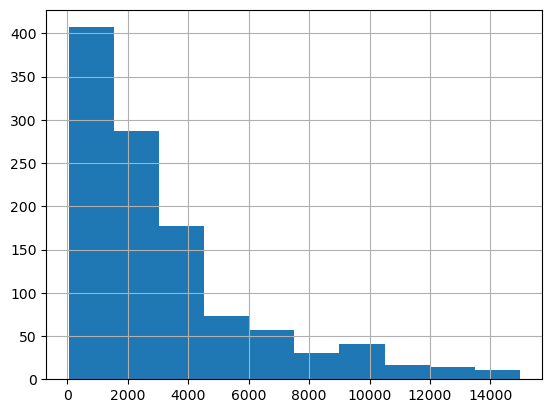

In [36]:
df['num_tokens_context'].hist()
plt.show()